In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option("max_columns", 100)
pd.set_option('display.max_rows',500)
from matplotlib.pyplot import figure as fg
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
train= pd.read_csv('/content/drive/My Drive/house-prices-advanced-regression-techniques (2)/train.csv')
test=pd.read_csv('/content/drive/My Drive/house-prices-advanced-regression-techniques (2)/test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train_id=train['Id']
test_id=test['Id']
train.drop('Id',axis=1,inplace=True)
test.drop('Id',axis=1,inplace=True)
comb=pd.concat((train,test)).reset_index(drop=True)
comb.drop('SalePrice',axis=1,inplace=True)
comb.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,NaN,0,2,CollgCr,61,5,7,Y,0,NaN,CompShg,Gable,Normal,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NaN,TA,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,NaN,0,5,Veenker,0,8,6,Y,0,NaN,CompShg,Gable,Normal,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,NaN,0,9,CollgCr,42,5,7,Y,0,NaN,CompShg,Gable,Normal,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,NaN,Gd,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,NaN,0,2,Crawfor,35,5,7,Y,0,NaN,CompShg,Gable,Abnorml,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,NaN,0,12,NoRidge,84,5,8,Y,0,NaN,CompShg,Gable,Normal,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [ ]:
comb['GarageAge']=comb['YrSold']-comb['GarageYrBlt']
for i in ['GarageType','GarageFinish','GarageQual','GarageCond']:
  comb[i]=comb[i].fillna('none')

comb['GarageAge']=comb['GarageAge'].fillna(0)
comb['FireplaceQu']=comb['FireplaceQu'].fillna('none')
for i in ['BsmtQual',	'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']:
  comb[i]=comb[i].fillna('none')

comb['MasVnrType']=comb['MasVnrType'].fillna('None')
comb['MasVnrArea']=comb['MasVnrArea'].fillna(comb['MasVnrArea'].mean())
for i in ['MiscFeature','Alley','Fence']:
  comb[i]=comb[i].fillna('none')

comb['LotFrontage']=comb['LotFrontage'].fillna(comb['LotFrontage'].mean())
comb['BsmtFinSF1']=comb['BsmtFinSF1'].astype(str).astype(float)



In [ ]:

comb['Electrical']=comb['Electrical'].fillna('SBrkr')
comb['HouseAge']=comb['YrSold']-comb['YearBuilt']
comb['Remodel']=np.where(comb['YearRemodAdd']==comb['YearBuilt'],1,0) 
comb.drop(['YrSold','YearBuilt','YearRemodAdd','GarageYrBlt'],axis=1, inplace=True)
comb['MSSubClass']=comb['MSSubClass'].apply(str)
tr_na=pd.DataFrame(comb.isnull().sum())
col=tr_na[tr_na[0]>0].sort_values(by=0,ascending=False).index
for c in col:
  rep= comb[c].median() if comb[c].dtype=='int64' else comb[c].value_counts().index[0]
  comb[c]=comb[c].fillna(rep)



In [ ]:
tr_na=pd.DataFrame(comb.isnull().sum())
tr_na[tr_na[0]>0].sort_values(by=0,ascending=False)

,0


In [ ]:
comb_dum= pd.get_dummies(comb,drop_first=True)
comb_dum.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GrLivArea,HalfBath,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,GarageAge,HouseAge,Remodel,Alley_Pave,Alley_none,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_none,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_none,BsmtFinType1_BLQ,BsmtFinType1_GLQ,...,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_NoSeWa
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,0,2,548.0,2.0,1710,1,1,8450,65.0,0,196.0,0,2,61,5,7,0,0,8,856.0,0,5.0,5,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,1,2,460.0,2.0,1262,0,1,9600,80.0,0,0.0,0,5,0,8,6,0,0,6,1262.0,298,31.0,31,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,1,2,608.0,2.0,1786,1,1,11250,68.0,0,162.0,0,9,42,5,7,0,0,6,920.0,0,7.0,7,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,1,1,642.0,3.0,1717,0,1,9550,60.0,0,0.0,0,2,35,5,7,0,0,7,756.0,0,8.0,91,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,1,2,836.0,3.0,2198,1,1,14260,84.0,0,350.0,0,12,84,5,8,0,0,9,1145.0,192,8.0,8,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0


In [ ]:
x_train=comb_dum[:len(train)]
x_test=comb_dum[len(train):]
y_train=train['SalePrice']
y_test=pd.read_csv('/content/drive/My Drive/house-prices-advanced-regression-techniques (2)/sample_submission.csv')
y_test.drop('Id',axis=1,inplace=True)

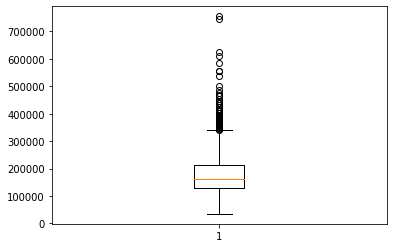

In [ ]:
plt.boxplot(train['SalePrice'])
plt.show()

In [ ]:
#Removed Outliers
temp= pd.concat((x_train,y_train),axis=1)
temp= temp[temp['SalePrice']<=400000]
y_train= temp['SalePrice']
x_train=temp.drop('SalePrice',axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler=StandardScaler()
x_tr_scaled=scaler.fit_transform(x_train)
x_te_scaled=scaler.transform(x_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
def score(model,x,y):
  pred=model.predict(x)
  s='{0:.2f}'.format(np.sqrt(np.square(pred-np.array(y)).mean()))
  return s

In [ ]:
score_df = []
# Linear Regression
ln_reg= LinearRegression().fit(x_tr_scaled,y_train)
score_df.append({'Model':'Linear Regression','Train Score':score(ln_reg,x_tr_scaled,y_train),'Test Score':score(ln_reg,x_te_scaled,y_test),'Parameters':'-'})
score_df

#Lasso

param={'alpha':[0.001,0.01,0.1,1,10,100]}
lasso_reg= GridSearchCV(Lasso(),param,cv=5).fit(x_tr_scaled,y_train)
score_df.append({'Model':'Lasso','Train Score':score(lasso_reg,x_tr_scaled,y_train),'Test Score':score(lasso_reg,x_te_scaled,y_test),'Parameters':lasso_reg.best_params_})

#Ridge

rid_reg=GridSearchCV(Ridge(), param,cv=5).fit(x_tr_scaled,y_train)
score_df.append({'Model':'Ridge','Train Score':score(rid_reg,x_tr_scaled,y_train),'Test Score':score(rid_reg,x_te_scaled,y_test),'Parameters':rid_reg.best_params_})

#Knn

param={'n_neighbors':list(range(1,20))}
knn_reg=GridSearchCV(KNeighborsRegressor(),param,cv=5).fit(x_tr_scaled,y_train)
score_df.append({'Model':'KNN','Train Score':score(knn_reg,x_tr_scaled,y_train),'Test Score':score(knn_reg,x_te_scaled,y_test),'Parameters':knn_reg.best_params_})

#Support Vector Machine

Cs = [0.01, 0.1, 1, 10]
gammas = [0.01, 0.1, 1]
param_grid = {'C': Cs,'gamma':gammas}
#svc rbf
svrr_reg = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=3).fit(x_tr_scaled,y_train)
score_df.append({'Model':'SVR rbf','Train Score':score(svrr_reg,x_tr_scaled,y_train),'Test Score':score(svrr_reg,x_te_scaled,y_test),'Parameters':svrr_reg.best_params_})
#svc sigmoid
svrs_reg = GridSearchCV(SVR(kernel='sigmoid'), param_grid, cv=3).fit(x_tr_scaled,y_train)
score_df.append({'Model':'SVR sigmoid','Train Score':score(svrs_reg,x_tr_scaled,y_train),'Test Score':score(svrs_reg,x_te_scaled,y_test),'Parameters':svrs_reg.best_params_})
#svc poly
svrp_reg = GridSearchCV(SVR(kernel='poly'), param_grid, cv=3).fit(x_tr_scaled,y_train)
score_df.append({'Model':'SVR poly','Train Score':score(svrp_reg,x_tr_scaled,y_train),'Test Score':score(svrp_reg,x_te_scaled,y_test),'Parameters':svrp_reg.best_params_})
#Linear SVC
svrl_reg=GridSearchCV(SVR(kernel='linear'),param_grid={'C':Cs},cv=3).fit(x_tr_scaled,y_train)
score_df.append({'Model':'SVR Linear','Train Score':score(svrl_reg,x_tr_scaled,y_train),'Test Score':score(svrl_reg,x_te_scaled,y_test),'Parameters':svrl_reg.best_params_})

project_1_reg= pd.DataFrame(score_df)
project_1_reg


,Model,Train Score,Test Score,Parameters
0,Linear Regression,17166.42,76254.44,-
1,Lasso,17732.24,74179.56,{'alpha': 100}
2,Ridge,19407.22,72248.77,{'alpha': 100}
3,KNN,28842.06,60623.87,{'n_neighbors': 8}
4,SVR rbf,67276.49,24823.47,"{'C': 10, 'gamma': 0.01}"
5,SVR sigmoid,62334.63,24606.43,"{'C': 10, 'gamma': 1}"
6,SVR poly,10811.36,77218.29,"{'C': 10, 'gamma': 0.1}"
7,SVR Linear,30139.85,53923.03,{'C': 10}


In [ ]:
ln=LinearRegression()
lasso=Lasso(alpha=100)
rid=Ridge(alpha=100)
knn_r=KNeighborsRegressor(n_neighbors=8)
svrr=SVR(C=10,gamma=0.01)
svrs=SVR(C=10,gamma=1)
svrp= SVR(C=10,gamma=0.1)
svrl=SVR(C=10)

In [ ]:
project_2_reg=[]
#bagging
from sklearn.ensemble import BaggingRegressor
bag_ln_reg = BaggingRegressor(ln, n_estimators=1000,max_samples=100, bootstrap=True, n_jobs=-1, random_state=42).fit(x_tr_scaled,y_train)
project_2_reg.append({'Model':'Bagging Linear','Train Score':score(bag_ln_reg,x_tr_scaled,y_train),'Test Score':score(bag_ln_reg,x_te_scaled,y_test)})

bag_knn_reg = BaggingRegressor(knn_r, n_estimators=1000,max_samples=100, bootstrap=True, n_jobs=-1, random_state=42).fit(x_tr_scaled,y_train)
project_2_reg.append({'Model':'Bagging KNN reg','Train Score':score(bag_knn_reg,x_tr_scaled,y_train),'Test Score':score(bag_knn_reg,x_te_scaled,y_test)})

bagging= pd.DataFrame(project_2_reg)
bagging

,Model,Train Score,Test Score
0,Bagging Linear,24559.37,69304.58
1,Bagging KNN reg,39316.69,42344.52


In [ ]:
#pasting
past_lasso_reg = BaggingRegressor(lasso, n_estimators=1000,max_samples=100, bootstrap=False, n_jobs=-1, random_state=42).fit(x_tr_scaled,y_train)
project_2_reg.append({'Model':'Bagging Lasso','Train Score':score(past_lasso_reg,x_tr_scaled,y_train),'Test Score':score(past_lasso_reg,x_te_scaled,y_test)})

past_rid_reg = BaggingRegressor(rid, n_estimators=1000,max_samples=100, bootstrap=False, n_jobs=-1, random_state=42).fit(x_tr_scaled,y_train)
project_2_reg.append({'Model':'Bagging Ridge','Train Score':score(past_rid_reg,x_tr_scaled,y_train),'Test Score':score(past_rid_reg,x_te_scaled,y_test)})

pasting_reg= pd.DataFrame(project_2_reg)
pasting_reg

,Model,Train Score,Test Score
0,Bagging Linear,24559.37,69304.58
1,Bagging KNN reg,39316.69,42344.52
2,Bagging Lasso,24685.74,69885.68
3,Bagging Ridge,27458.28,58369.52


In [ ]:
#ADABoost
ada_rid_reg= AdaBoostRegressor(base_estimator=rid, learning_rate=0.1, loss='square',n_estimators=1000, random_state=0).fit(x_tr_scaled,y_train) 
project_2_reg.append({'Model':'ADA Ridge','Train Score':score(ada_rid_reg,x_tr_scaled,y_train),'Test Score':score(ada_rid_reg,x_te_scaled,y_test)})

ada_lasso_reg= AdaBoostRegressor(base_estimator=lasso, learning_rate=0.1, loss='square',n_estimators=1000, random_state=0).fit(x_tr_scaled,y_train) 
project_2_reg.append({'Model':'ADA Lasso','Train Score':score(ada_lasso_reg,x_tr_scaled,y_train),'Test Score':score(ada_lasso_reg,x_te_scaled,y_test)})

ada_reg= pd.DataFrame(project_2_reg)
ada_reg

,Model,Train Score,Test Score
0,Bagging Linear,24559.37,69304.58
1,Bagging KNN reg,39316.69,42344.52
2,Bagging Lasso,24685.74,69885.68
3,Bagging Ridge,27458.28,58369.52
4,ADA Ridge,26553.79,77672.63
5,ADA Lasso,24679.04,78288.25


In [ ]:
learning_rate=[0.01,0.1,1]
n_estimators=[100,500,1000]
params={
    'learning_rate':learning_rate,
    'n_estimators':n_estimators}
gb_reg= GridSearchCV(GradientBoostingRegressor(),params).fit(x_tr_scaled,y_train)
project_2_reg.append({'Model':'Gradient Boost','Train Score':score(gb_reg,x_tr_scaled,y_train),'Test Score':score(gb_reg,x_te_scaled,y_test)})
all_models=pd.DataFrame(project_2_reg)
all_models

,Model,Train Score,Test Score
0,Bagging Linear,24559.37,69304.58
1,Bagging KNN reg,39316.69,42344.52
2,Bagging Lasso,24685.74,69885.68
3,Bagging Ridge,27458.28,58369.52
4,ADA Ridge,26553.79,77672.63
5,ADA Lasso,24679.04,78288.25
6,Gradient Boost,6765.64,71136.89


In [ ]:
from sklearn.decomposition import PCA
pca=PCA(0.95)
pca.fit(x_tr_scaled)
x_tr_p=pca.transform(x_tr_scaled)
x_te_p=pca.transform(x_te_scaled)

In [ ]:
score_df_pca = []
# Linear Regression
ln_reg= LinearRegression().fit(x_tr_p,y_train)
score_df_pca.append({'Model':'Linear Regression','Train Score':score(ln_reg,x_tr_p,y_train),'Test Score':score(ln_reg,x_te_p,y_test),'Parameters':'-'})
score_df

#Lasso

param={'alpha':[0.001,0.01,0.1,1,10,100]}
lasso_reg= GridSearchCV(Lasso(),param,cv=5).fit(x_tr_p,y_train)
score_df_pca.append({'Model':'Lasso','Train Score':score(lasso_reg,x_tr_p,y_train),'Test Score':score(lasso_reg,x_te_p,y_test),'Parameters':lasso_reg.best_params_})

#Ridge

rid_reg=GridSearchCV(Ridge(), param,cv=5).fit(x_tr_p,y_train)
score_df_pca.append({'Model':'Ridge','Train Score':score(rid_reg,x_tr_p,y_train),'Test Score':score(rid_reg,x_te_p,y_test),'Parameters':rid_reg.best_params_})

#Knn

param={'n_neighbors':list(range(1,20))}
knn_reg=GridSearchCV(KNeighborsRegressor(),param,cv=5).fit(x_tr_p,y_train)
score_df_pca.append({'Model':'KNN','Train Score':score(knn_reg,x_tr_p,y_train),'Test Score':score(knn_reg,x_te_p,y_test),'Parameters':knn_reg.best_params_})

#Support Vector Machine

Cs = [0.01, 0.1, 1, 10]
gammas = [0.01, 0.1, 1]
param_grid = {'C': Cs,'gamma':gammas}
#svr rbf
svrr_reg = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=3).fit(x_tr_p,y_train)
score_df_pca.append({'Model':'SVR rbf','Train Score':score(svrr_reg,x_tr_p,y_train),'Test Score':score(svrr_reg,x_te_p,y_test),'Parameters':svrr_reg.best_params_})
#svr sigmoid
svrs_reg = GridSearchCV(SVR(kernel='sigmoid'), param_grid, cv=3).fit(x_tr_p,y_train)
score_df_pca.append({'Model':'SVR sigmoid','Train Score':score(svrs_reg,x_tr_p,y_train),'Test Score':score(svrs_reg,x_te_p,y_test),'Parameters':svrs_reg.best_params_})
#svr poly
svrp_reg = GridSearchCV(SVR(kernel='poly'), param_grid, cv=3).fit(x_tr_p,y_train)
score_df_pca.append({'Model':'SVR poly','Train Score':score(svrp_reg,x_tr_p,y_train),'Test Score':score(svrp_reg,x_te_p,y_test),'Parameters':svrp_reg.best_params_})
#Linear SVR
svrl_reg=GridSearchCV(SVR(kernel='linear'),param_grid={'C':Cs},cv=3).fit(x_tr_p,y_train)
score_df_pca.append({'Model':'SVR Linear','Train Score':score(svrl_reg,x_tr_p,y_train),'Test Score':score(svrl_reg,x_te_p,y_test),'Parameters':svrl_reg.best_params_})

project_1_reg_pca= pd.DataFrame(score_df_pca)
project_1_reg_pca

,Model,Train Score,Test Score,Parameters
0,Linear Regression,22493.95,72101.49,-
1,Lasso,22531.42,71392.20,{'alpha': 100}
2,Ridge,22541.76,70973.11,{'alpha': 100}
3,KNN,28802.65,61321.26,{'n_neighbors': 8}
4,SVR rbf,67250.17,24806.19,"{'C': 10, 'gamma': 0.01}"
5,SVR sigmoid,62324.05,24587.30,"{'C': 10, 'gamma': 1}"
6,SVR poly,12399.18,77280.75,"{'C': 0.01, 'gamma': 1}"
7,SVR Linear,30492.45,53629.58,{'C': 10}


In [ ]:
project_1_reg.drop(['Parameters','Train Score'],axis=1).merge(project_1_reg_pca.drop(['Parameters','Train Score'],axis=1), on=['Model'])

,Model,Test Score_x,Test Score_y
0,Linear Regression,76254.44,72101.49
1,Lasso,74179.56,71392.20
2,Ridge,72248.77,70973.11
3,KNN,60623.87,61321.26
4,SVR rbf,24823.47,24806.19
5,SVR sigmoid,24606.43,24587.30
6,SVR poly,77218.29,77280.75
7,SVR Linear,53923.03,53629.58


We do see slight improvements in RMSE score, Although SVR rbf and sigmoid seems to have lowest rmse, but they are not consistent, Looks like underfitting. However, SVR Linear has lowest RMSE with consistent results

In [ ]:
x_tr_p.shape

(1432, 168)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


In [ ]:
def create_model():
  model=Sequential()
  model.add(Dense(168, input_dim=168,activation='relu'))
  model.add(Dense(84,activation='relu'))
  model.add(Dense(42,activation='relu'))
  model.add(Dense(20,activation='relu'))
  model.add(Dense(1,activation='sigmoid'))

  model.compile(loss='mean_squared_error', optimizer='adam', metrics= ['accuracy'])

  return model

In [ ]:
seed= 10
np.random.seed(10)
model= KerasClassifier(build_fn=create_model,verbose=0)
param_grid= {'batch_size':[20,30,40], 'epochs': [50,150,300] }
nn_reg= GridSearchCV(model, param_grid=param_grid, cv=3 ).fit(x_tr_p,y_train)

In [ ]:
print('Train Score:{} '.format(score(nn_reg,x_tr_p,y_train)),'Test Score: {}'.format(score(nn_reg,x_te_p,y_test)))

Train Score:154338.73  Test Score: 144817.42
